In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
data = pd.read_csv('data/Finaltrain.csv')
data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,346,61,0,3,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,1225,203,3,29,79
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,345,60,0,9,24
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,451,76,0,10,33
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,145,27,0,2,10


In [4]:
# randomize data
data = data.sample(frac=1).reset_index(drop=True) # Mezclar los datos

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,a2f227aaba7c,3b9047,"the article by USthistory.org, ""egyptian socia...",0.985008,0.623245,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,584,87,0,29,38
1,55c7b370c59c,3b9047,Egyptian society had different social classes ...,0.376374,0.463619,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,497,81,0,10,39
2,bd686f1a1833,3b9047,The structure of the ancient Egyptain system o...,1.648853,1.171598,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,1324,248,0,35,128
3,fd3f139ec5d2,3b9047,Egytian society was structured like a pyramid....,-0.093814,0.503833,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,269,43,0,5,18
4,129d44b40916,3b9047,because acient eygpt fought for there country ...,-1.547163,-1.461245,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,171,27,0,0,12


## Preprocesamiento

In [5]:
# normalizar variables numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']] = scaler.fit_transform(data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']])

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,a2f227aaba7c,3b9047,"the article by USthistory.org, ""egyptian socia...",0.985008,0.623245,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.122844,0.1040,0.0,0.184713,0.127517
1,55c7b370c59c,3b9047,Egyptian society had different social classes ...,0.376374,0.463619,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.100105,0.0944,0.0,0.063694,0.130872
2,bd686f1a1833,3b9047,The structure of the ancient Egyptain system o...,1.648853,1.171598,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.316257,0.3616,0.0,0.222930,0.429530
3,fd3f139ec5d2,3b9047,Egytian society was structured like a pyramid....,-0.093814,0.503833,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.040512,0.0336,0.0,0.031847,0.060403
4,129d44b40916,3b9047,because acient eygpt fought for there country ...,-1.547163,-1.461245,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.014898,0.0080,0.0,0.000000,0.040268


In [6]:
tokenizer = Tokenizer(num_words=10000)  # Limitar a las 10,000 palabras más comunes
tokenizer.fit_on_texts(data['text'] + ' ' + data['prompt_text'])

In [7]:
sequences = tokenizer.texts_to_sequences(data['text'] + ' ' + data['prompt_text'])

In [8]:
maxlen = 200  # Puedes ajustar este valor según la longitud promedio
X = pad_sequences(sequences, maxlen=maxlen)

In [9]:
# Combinar las etiquetas en una matriz
y = data[['content', 'wording']].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Separar las etiquetas después de la división
y_content_train = y_train[:, 0]
y_wording_train = y_train[:, 1]
y_content_test = y_test[:, 0]
y_wording_test = y_test[:,1]

## RNN

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout


In [12]:
input_ = Input(shape=(maxlen,))

x = Embedding(input_dim=10000, output_dim=128, input_length=maxlen)(input_)

x = LSTM(256, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

In [13]:
# Predicción de content
content_output = Dense(1, activation='linear', name='content')(x)

# Predicción de wording
wording_output = Dense(1, activation='linear', name='wording')(x)

In [ ]:
optimizer = 'adam'
loss = 'mean_squared_error'
metrics = {
    'content': ['mae'],   # Métrica para la salida 'content'
    'wording': ['mae']    # Métrica para la salida 'wording'
}
epochs = 15
batch_size = 256


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [16]:
model = Model(inputs=input_, outputs=[content_output, wording_output])
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 200, 128)     1280000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 200, 256)     394240      ['embedding[0][0]']              
                                                                                                  
 dropout (Dropout)              (None, 200, 256)     0           ['lstm[0][0]']                   
                                                                                              

In [18]:
history = model.fit(
    X_train, 
    [y_content_train, y_wording_train], 
    validation_data=(X_test, [y_content_test, y_wording_test]), 
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/15


ValueError: in user code:

    File "c:\Users\Alejandro\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Alejandro\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Alejandro\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Alejandro\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\Alejandro\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\Alejandro\.conda\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "c:\Users\Alejandro\.conda\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 506, in build
        self._set_metric_names()
    File "c:\Users\Alejandro\.conda\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 532, in _set_metric_names
        raise ValueError(

    ValueError: Found two metrics with the same name: content_mae. All the metrics added to the model need to have unique names.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_content_pred, y_wording_pred = model.predict(X_test)

print('MAE content:', mean_absolute_error(y_content_test, y_content_pred))
print('MSE content:', mean_squared_error(y_content_test, y_content_pred))
print('R2 content:', r2_score(y_content_test, y_content_pred))

print('\nMAE wording:', mean_absolute_error(y_wording_test, y_wording_pred))
print('MSE wording:', mean_squared_error(y_wording_test, y_wording_pred))
print('R2 wording:', r2_score(y_wording_test, y_wording_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step
MAE content: 0.36914957907679663
MSE content: 0.21968992671798276
R2 content: 0.7986475444412678

MAE wording: 0.5117254107471297
MSE wording: 0.4383053175930052
R2 wording: 0.6029726999776077


# Guardando el modelo

In [ ]:
model.save('rnn')

In [ ]:
import matplotlib.pyplot as plt

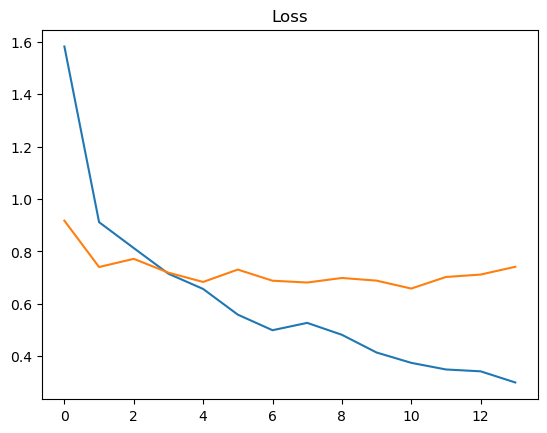

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

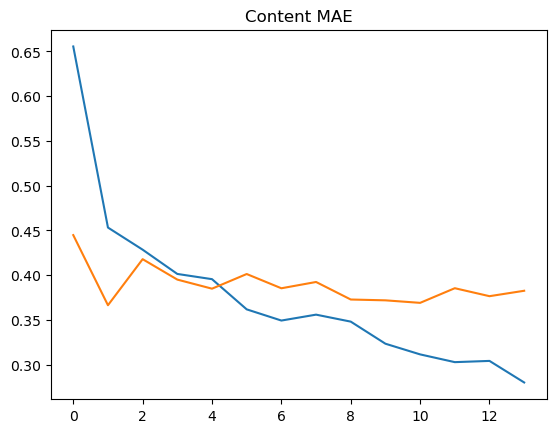

In [ ]:
plt.plot(history.history['content_mae'])
plt.plot(history.history['val_content_mae'])
plt.title('Content MAE')
plt.show()

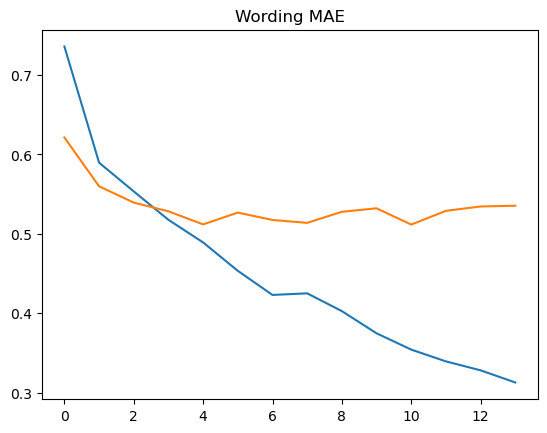

In [ ]:
plt.plot(history.history['wording_mae'])
plt.plot(history.history['val_wording_mae'])
plt.title('Wording MAE')
plt.show()

# Cargando el modelo

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('rnn')